In [41]:
from agents import Agent, Runner, function_tool, ItemHelpers

@function_tool
def get_weather(city: str):
    """날씨를 알려주는 도구"""
    print(city)
    print("==========")
    return "30 degree"

agent = Agent(
    name="Assistant agent",
    instructions="you are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather]
)

stream = Runner.run_streamed(
    agent, "How are you? what is the weather in the capital of korea?"
)

async for event in stream.stream_events():
    if event.type == "raw_response_event":
        continue
    elif event.type == "agent_updated_stream_event":
        print("agent updated to:", event.new_agent.name)
    elif event.type == "run_item_stream_event":
        if event.item.type == "tool_call_item":
            print("tool_call_item =", event.item.raw_item.to_dict()) # item은 AI 에이전트가 수행하는 각각의 작업 단위를 나타내는 객체
        elif event.item.type == "tool_call_output_item":
            print("tool_call_output_item =", event.item.output)
        elif event.item.type == "message_output_item":
            print(ItemHelpers.text_message_output(event.item))
    print("==========")

agent updated to: Assistant agent
tool_call_item = {'arguments': '{"city":"Seoul"}', 'call_id': 'call_UGy90TrO05CzdfwPPx44hTpK', 'name': 'get_weather', 'type': 'function_call', 'id': 'fc_68d2b52fbbf8819fa1d55b6502f20f7d0d479b7c573b11f3', 'status': 'completed'}
Seoul
tool_call_output_item = 30 degree
I'm doing well, thank you for asking! The weather in Seoul, the capital of Korea, is currently 30 degrees (likely Celsius). If you need more details about the weather, such as forecast or conditions, please let me know!


In [47]:
from agents import Agent, Runner, function_tool, ItemHelpers

@function_tool
def get_weather(city: str):
    """날씨를 알려주는 도구"""
    # print(city)
    # print("==========")
    return "30 degree"

agent = Agent(
    name="Assistant agent",
    instructions="you are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather]
)

stream = Runner.run_streamed(
    agent, "How are you? what is the weather in the capital of korea?"
)

message = ""
args = ""

async for event in stream.stream_events():
    if event.type == "raw_response_event":
        event_type = event.data.type
        # print(event_type)
        if event_type == "response.output_text.delta": # delta는 변화량, "조금씩 추가되는 부분"
            message += event.data.delta
            print("메세지:", message)
        elif event_type == "response.function_call_arguments.delta":
            args += event.data.delta
            print("args:", args)
        elif event_type == "response.completed":
            message = ""
            args = ""

args: {"
args: {"city
args: {"city":"
args: {"city":"Se
args: {"city":"Seoul
args: {"city":"Seoul"}
메세지: I'm
메세지: I'm just
메세지: I'm just a
메세지: I'm just a virtual
메세지: I'm just a virtual assistant
메세지: I'm just a virtual assistant,
메세지: I'm just a virtual assistant, so
메세지: I'm just a virtual assistant, so I
메세지: I'm just a virtual assistant, so I don't
메세지: I'm just a virtual assistant, so I don't have
메세지: I'm just a virtual assistant, so I don't have feelings
메세지: I'm just a virtual assistant, so I don't have feelings,
메세지: I'm just a virtual assistant, so I don't have feelings, but
메세지: I'm just a virtual assistant, so I don't have feelings, but thank
메세지: I'm just a virtual assistant, so I don't have feelings, but thank you
메세지: I'm just a virtual assistant, so I don't have feelings, but thank you for
메세지: I'm just a virtual assistant, so I don't have feelings, but thank you for asking
메세지: I'm just a virtual assistant, so I don't have feelings, but thank you for asking!


메세지: I'

In [63]:
from agents import Agent, Runner, function_tool, SQLiteSession

session = SQLiteSession(
    session_id="정재현", db_path="ai-memory-db"
)

@function_tool
def get_weather(city: str):
    return "30 degree"

agent = Agent(
    name = "Assistant Agent",
    instructions="You are a helpful Assistant Agent. Use tools when you needed to answer question.",
    tools=[get_weather]
)

In [60]:
result = await Runner.run(agent, "내 이름이 뭐라고?", session=session)

print(result.final_output)

정재현님, 네! 정재현님이십니다. 무엇을 도와드릴까요?


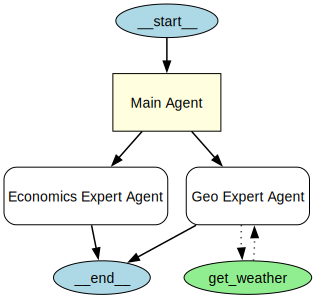

In [13]:
from agents import Agent, Runner, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

class Answer(BaseModel):
    answer: str
    background_explanation: str

session = SQLiteSession(
    "정재현", "ai-memory.db"
)

@function_tool
def get_weather():
    return "30 degree"

geography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools=[get_weather],
    output_type=Answer
)

economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economic related questions."
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        geography_agent, 
        economics_agent
        ]
)

draw_graph(main_agent)

In [15]:
result = await Runner.run(
    main_agent,
    "What is the capital of Thailand's northern province?"
)
print(result.last_agent.name)
print(result.final_output)

Geo Expert Agent
answer="The capital of Thailand's northern province, Chiang Mai, is the city of Chiang Mai." background_explanation="Thailand is divided into several regions, and 'northern province' generally refers to Chiang Mai Province, which is the largest and most well-known province in northern Thailand. The capital city of this province shares the same name, Chiang Mai."


In [21]:
import agents

import sys, shutil

print(sys.executable)
print(shutil.which("python"))
print(agents.__file__)

c:\agent\ai-agent-compliation\chatgpt-clone\.venv\Scripts\python.exe
c:\agent\ai-agent-compliation\chatgpt-clone\.venv\Scripts\python.EXE
c:\agent\ai-agent-compliation\chatgpt-clone\.venv\Lib\site-packages\agents\__init__.py


# response.content_part.added란?

**`response.content_part.added`**는 AI가 답변을 구성할 때 **"내용 부분을 추가했어요"**라는 의미입니다.

## content_part란?

### 1. 기본 개념
- **"내용 구성 요소"**를 의미
- AI 답변이 여러 종류의 내용으로 구성될 수 있기 때문

### 2. content_part의 종류들

#### 텍스트 부분
response.content_part.added → "텍스트 부분 추가"  
response.output_text.delta → "텍스트를 한 글자씩 생성"  
response.content_part.done → "텍스트 부분 완료"  

#### 이미지 부분 (예시)
response.content_part.added → "이미지 부분 추가"  
response.image_data.delta → "이미지 데이터 생성"  
response.content_part.done → "이미지 부분 완료"  

#### 코드 부분 (예시)
response.content_part.added → "코드 부분 추가"  
response.code_block.delta → "코드를 한 줄씩 생성"  
response.content_part.done → "코드 부분 완료"  

## 일상 예시로 설명

**편지를 쓰는 상황:**
1. "편지지를 준비했습니다" (`output_item.added`)
2. "인사말 부분을 추가합니다" (`content_part.added`)  
3. "안녕하세요..." (`output_text.delta`)
4. "인사말 부분 완료" (`content_part.done`)
5. "본문 부분을 추가합니다" (`content_part.added`)
6. "오늘은..." (`output_text.delta`)
7. "편지 완성" (`output_item.done`)

## 왜 이렇게 나누나?

### 복잡한 답변 구조 지원
- 텍스트 + 이미지 + 코드가 섞인 답변
- 각 부분을 독립적으로 처리
- 실시간으로 다양한 형태의 내용 표시

**즉, `response.content_part.added`는 "답변의 새로운 내용 구성 요소를 시작합니다"라는 신호입니다!**

현재 코드에서는 단순한 텍스트 답변이라서 텍스트 content_part 하나만 추가된 것입니다.

# delta

## delta의 기본 의미

### 1. 수학/과학에서
- **Δ (델타)**: 변화량을 나타내는 그리스 문자
- 예: `Δx = x2 - x1` (x의 변화량)

### 2. 프로그래밍에서
- **"점진적 변화", "증분"**을 의미
- 전체가 아닌 **새로 추가된 부분만**

## 왜 delta를 사용하나?

### 1. 효율성
- 전체 텍스트를 매번 다시 보내지 않음
- **새로 추가된 부분만** 전송

### 2. 실시간성
- ChatGPT처럼 **타이핑하는 효과**
- 사용자가 답변이 생성되는 과정을 실시간으로 볼 수 있음

### 3. 네트워크 절약
- 데이터 전송량 최소화